In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_Credit_Card.csv")

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Remove ID column if present
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# Rename target for simplicity
df = df.rename(columns={
    "default.payment.next.month": "default"
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

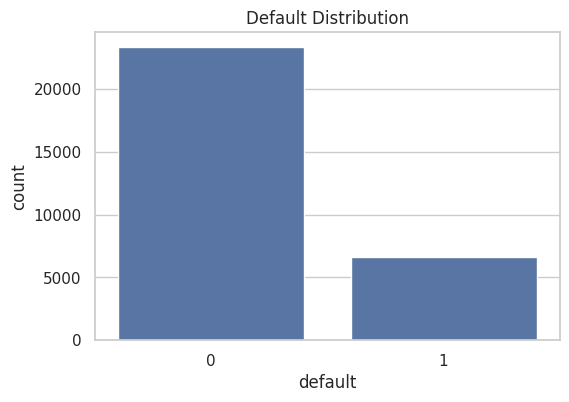

Class Distribution:
default
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="default", data=df)
plt.title("Default Distribution")
plt.show()

print("Class Distribution:")
print(df["default"].value_counts(normalize=True))

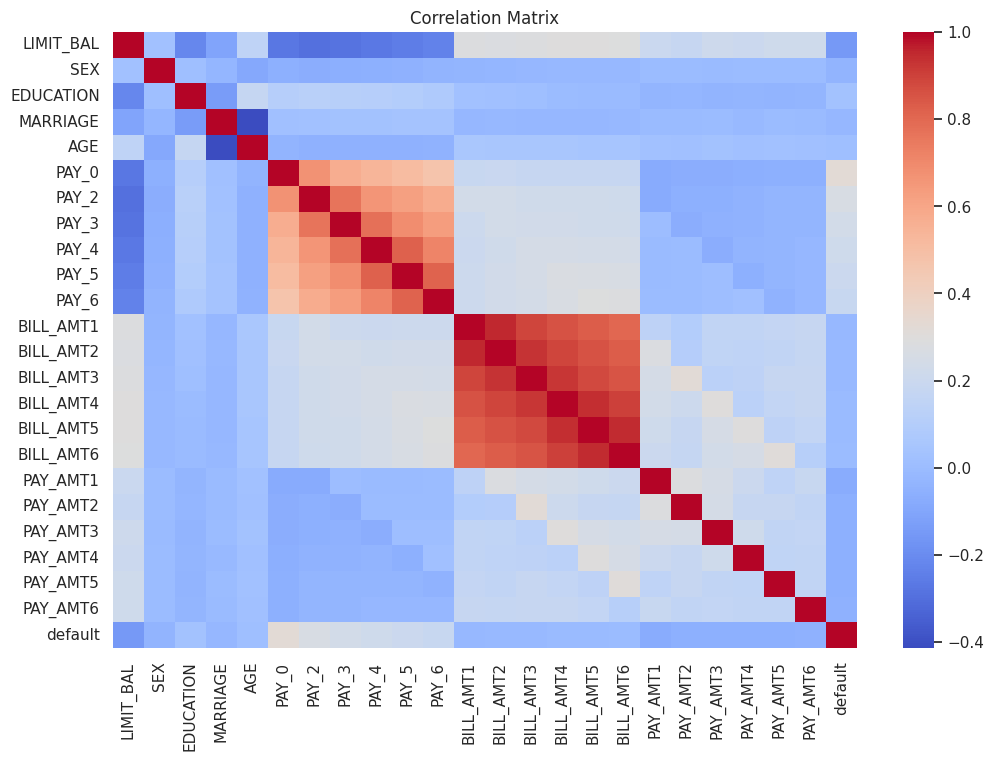

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
X = df.drop("default", axis=1)
y = df["default"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_model = LogisticRegression(max_iter=2000, class_weight="balanced")
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

roc_log = roc_auc_score(
    y_test,
    log_model.predict_proba(X_test_scaled)[:,1]
)

print("Logistic ROC-AUC:", roc_log)

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

Logistic ROC-AUC: 0.7081149369197677


In [10]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

roc_rf = roc_auc_score(
    y_test,
    rf_model.predict_proba(X_test)[:,1]
)

print("Random Forest ROC-AUC:", roc_rf)

Random Forest Results
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

Random Forest ROC-AUC: 0.7578613436291891


In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("Neural Network Results")
print(classification_report(y_test, y_pred_mlp))

roc_mlp = roc_auc_score(
    y_test,
    mlp.predict_proba(X_test_scaled)[:,1]
)

print("Neural Network ROC-AUC:", roc_mlp)

Neural Network Results
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Neural Network ROC-AUC: 0.7659202740945878


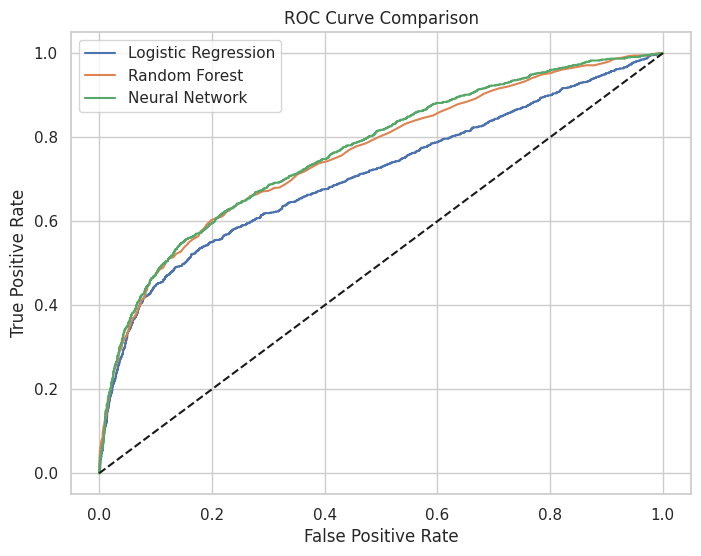

In [12]:
fpr_log, tpr_log, _ = roc_curve(
    y_test,
    log_model.predict_proba(X_test_scaled)[:,1]
)

fpr_rf, tpr_rf, _ = roc_curve(
    y_test,
    rf_model.predict_proba(X_test)[:,1]
)

fpr_mlp, tpr_mlp, _ = roc_curve(
    y_test,
    mlp.predict_proba(X_test_scaled)[:,1]
)

plt.figure(figsize=(8,6))

plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_mlp, tpr_mlp, label="Neural Network")

plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

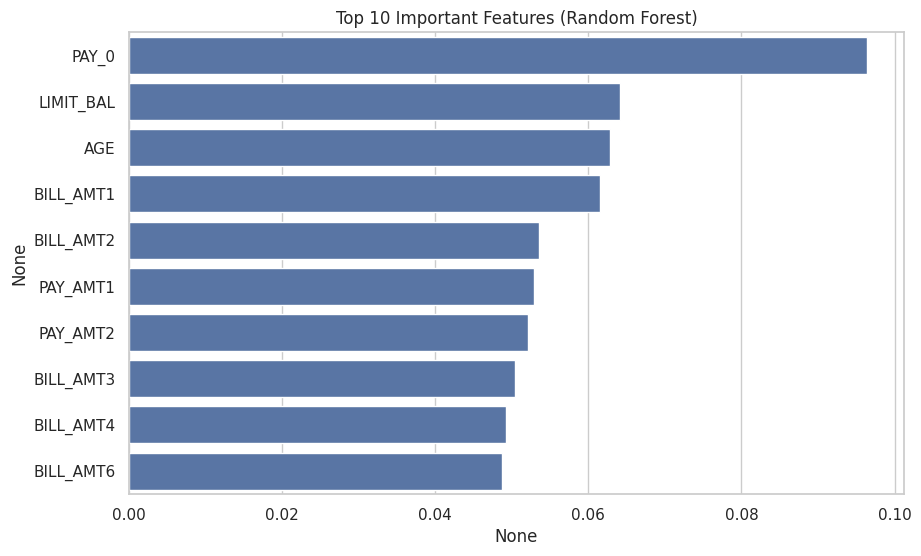

In [13]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

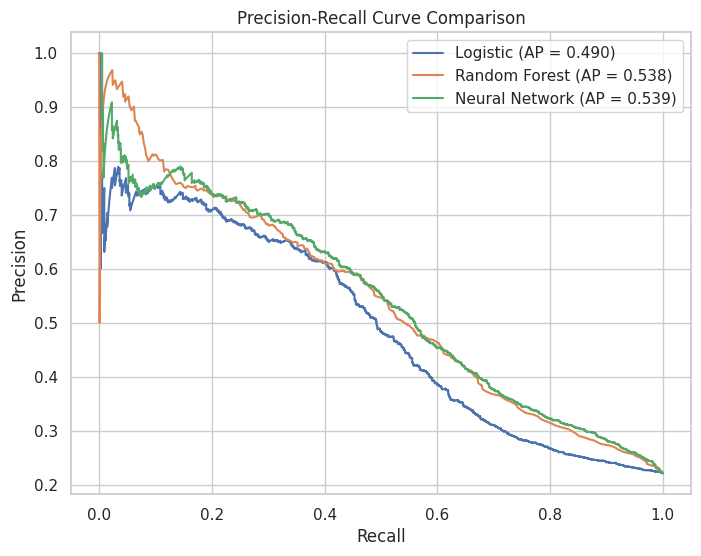

In [16]:
# Logistic
precision_log, recall_log, _ = precision_recall_curve(
    y_test,
    log_model.predict_proba(X_test_scaled)[:,1]
)
ap_log = average_precision_score(
    y_test,
    log_model.predict_proba(X_test_scaled)[:,1]
)

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(
    y_test,
    rf_model.predict_proba(X_test)[:,1]
)
ap_rf = average_precision_score(
    y_test,
    rf_model.predict_proba(X_test)[:,1]
)

# Neural Network
precision_mlp, recall_mlp, _ = precision_recall_curve(
    y_test,
    mlp.predict_proba(X_test_scaled)[:,1]
)
ap_mlp = average_precision_score(
    y_test,
    mlp.predict_proba(X_test_scaled)[:,1]
)

# Plot
plt.figure(figsize=(8,6))

plt.plot(recall_log, precision_log, label=f"Logistic (AP = {ap_log:.3f})")
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP = {ap_rf:.3f})")
plt.plot(recall_mlp, precision_mlp, label=f"Neural Network (AP = {ap_mlp:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()